<a href="https://colab.research.google.com/github/GitShamil/University_projects/blob/main/BonusTask5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

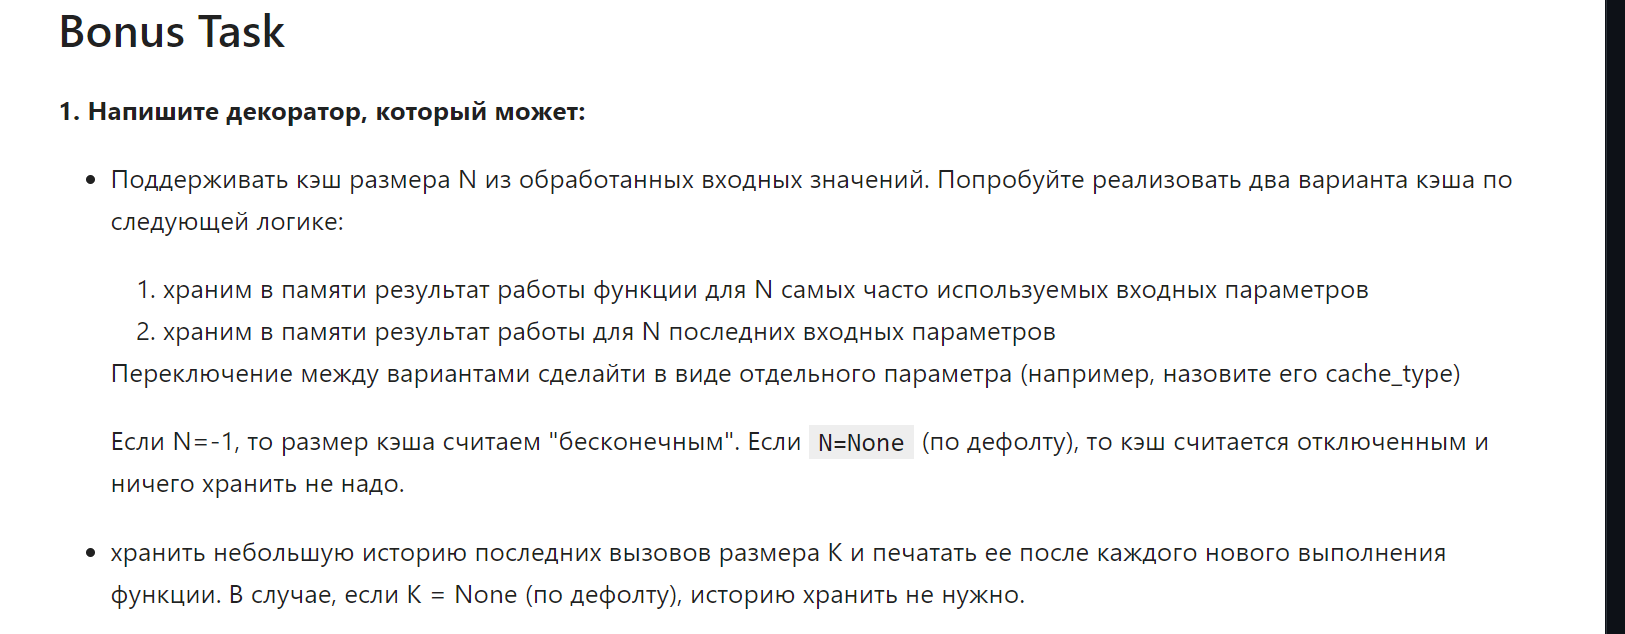

выполняю пункт с хранением n последних

In [ ]:
from functools import wraps
from functools import lru_cache
from collections import deque
import time

In [ ]:
def cache(N=None):
  if N == None:
    N = 0
  if N == -1:
    N = 10**10
  def decorate(func):
    memory = deque()
    history = deque()
    @wraps(func)
    def clocked(*args, **kwargs): 
      nonlocal history
      if (len(history)>=N):
        history.pop()
      history.appendleft(f"function({args},{kwargs})")
      wasFound = False
      for args1, kwargs1, ans in memory:
        if ((args1,kwargs1)==(args,kwargs)):
          res = ans
          wasFound = True
          break
      if (wasFound==False):
        if (len(memory)>=N and N!=0):
            memory.pop()
        res = func(*args, **kwargs)
        if (len(memory)<=N and N!=0):
          memory.appendleft((args,kwargs,res))
      print(history)
      return res
    return clocked
    
  return decorate


In [ ]:
@cache(3)
def calc_fib(n):
    time.sleep(0.01)
    if n < 2:
        return n
    
    return calc_fib(n - 1) + calc_fib(n - 2)

In [ ]:
%%time
calc_fib(8)

deque(['function((1,),{})', 'function((2,),{})', 'function((3,),{})'])
deque(['function((0,),{})', 'function((1,),{})', 'function((2,),{})'])
deque(['function((0,),{})', 'function((1,),{})', 'function((2,),{})'])
deque(['function((1,),{})', 'function((0,),{})', 'function((1,),{})'])
deque(['function((1,),{})', 'function((0,),{})', 'function((1,),{})'])
deque(['function((2,),{})', 'function((1,),{})', 'function((0,),{})'])
deque(['function((2,),{})', 'function((1,),{})', 'function((0,),{})'])
deque(['function((3,),{})', 'function((2,),{})', 'function((1,),{})'])
deque(['function((3,),{})', 'function((2,),{})', 'function((1,),{})'])
deque(['function((3,),{})', 'function((4,),{})', 'function((3,),{})'])
deque(['function((2,),{})', 'function((3,),{})', 'function((4,),{})'])
deque(['function((2,),{})', 'function((3,),{})', 'function((4,),{})'])
deque(['function((2,),{})', 'function((3,),{})', 'function((4,),{})'])
deque(['function((4,),{})', 'function((5,),{})', 'function((2,),{})'])
deque(

21

In [ ]:
def calc_fib(n):
    time.sleep(0.01)
    if n < 2:
        return n
    
    return calc_fib(n - 1) + calc_fib(n - 2)

In [ ]:
%%time
calc_fib(8)

CPU times: user 7.41 ms, sys: 1.06 ms, total: 8.47 ms
Wall time: 679 ms


21

Теперь хранить буду популярные N. Я посчитал этот пункт совершенно бессмысленным. Так как он просто по смыслу будет аналогичен решению выше с n = -1. Чтобы выяснить самые часто используемые параметры мы должны всегда хранить все параметры от каждого вызова функции. То есть по факту мы будем тратить неограниченную память, хотя указали хранить там допустим 20 самых частых ответов функции.
